In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


In [26]:
df = pd.read_csv("/home/hadiii/python3/Cust_Segmentation.csv")

print("Shape:", df.shape)
print(df.head())

Shape: (850, 10)
   Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted Address  DebtIncomeRatio  
0        0.0  NBA001              6.3  
1        0.0  NBA021             12.8  
2        1.0  NBA013             20.9  
3        0.0  NBA009              6.3  
4        0.0  NBA008              7.2  


In [27]:
features = df.drop(columns=["Customer Id", "Address", "Defaulted"])
features = features.dropna()

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

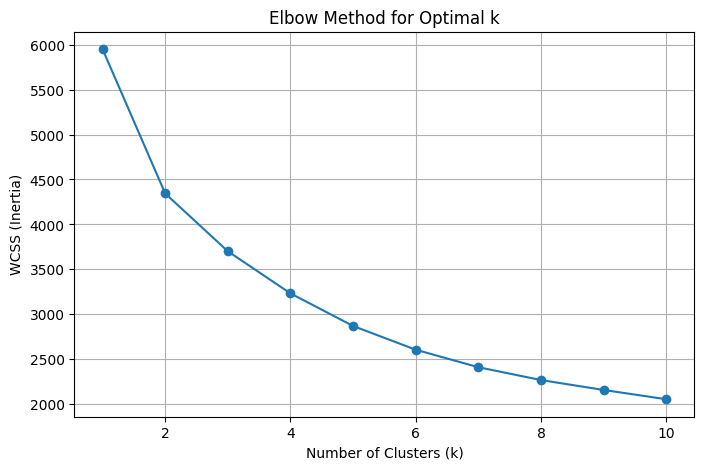

In [29]:
wcss = []

K_range = range(1, 11)
for k in K_range:
    km = KMeans(
        n_clusters=k,
        init="k-means++",
        n_init=10,
        random_state=42
    )
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

In [30]:
kmeans = KMeans(
    n_clusters=4,
    init="k-means++",
    n_init=10,
    random_state=42
)

clusters = kmeans.fit_predict(X_scaled)
df["Cluster"] = clusters


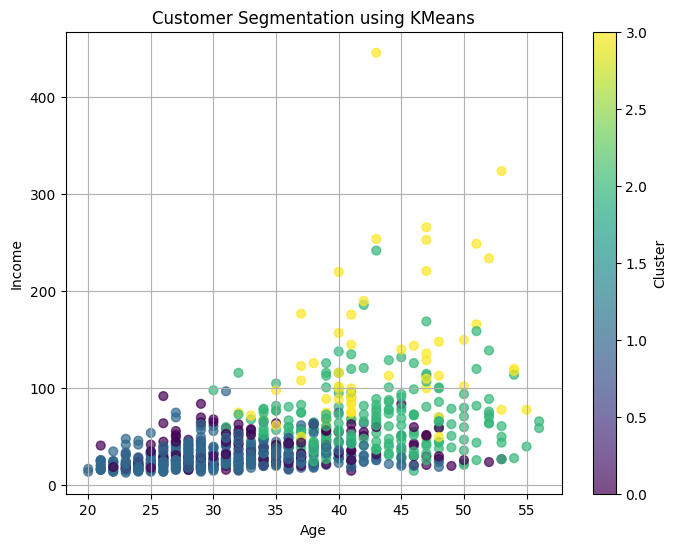

In [37]:
plt.figure(figsize=(8, 6))

plt.scatter(
    df["Age"],
    df["Income"],
    c=df["Cluster"],
    cmap="viridis",
    s=40,
    alpha=0.7
)

plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Customer Segmentation using KMeans")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

In [32]:
cluster_summary = df.groupby("Cluster").mean(numeric_only=True)
print(cluster_summary)


         Customer Id        Age       Edu  Years Employed      Income  \
Cluster                                                                 
0         429.537415  34.217687  1.911565        6.564626   38.360544   
1         432.811189  30.470862  1.652681        4.741259   28.689977   
2         404.634259  42.398148  1.578704       14.986111   65.486111   
3         438.896552  43.362069  2.120690       18.017241  130.724138   

         Card Debt  Other Debt  Defaulted  DebtIncomeRatio  
Cluster                                                     
0         2.409932    4.820803   0.495935        19.547619  
1         0.657841    1.397559   0.250000         7.515152  
2         1.425458    2.942324   0.082353         7.196759  
3         6.826276   11.606966   0.382979        17.136207  


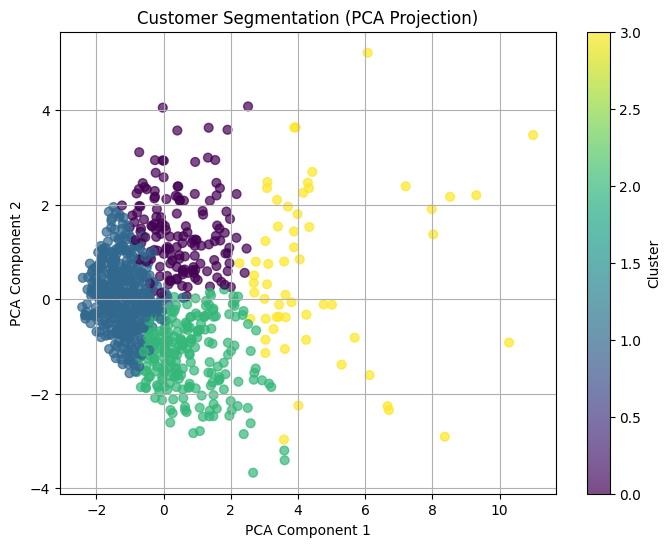

In [33]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=df["Cluster"],
    cmap="viridis",
    s=40,
    alpha=0.7
)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Segmentation (PCA Projection)")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()


In [34]:
centroids = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=features.columns
)

print(centroids.round(2))


     Age   Edu  Years Employed  Income  Card Debt  Other Debt  DebtIncomeRatio
0  34.22  1.91            6.56   38.36       2.41        4.82            19.55
1  30.40  1.64            4.70   28.49       0.66        1.40             7.55
2  42.31  1.60           14.89   65.20       1.41        2.91             7.13
3  43.36  2.12           18.02  130.72       6.83       11.61            17.14


/tmp/ipykernel_27139/1857708873.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


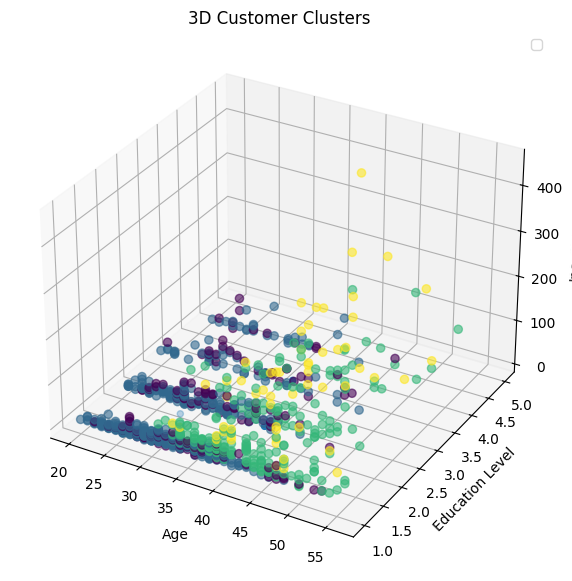

In [61]:
centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)

age_idx = features.columns.get_loc("Age")
edu_idx = features.columns.get_loc("Edu")
income_idx = features.columns.get_loc("Income")

fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df["Age"],
    df["Edu"],
    df["Income"],
    c=df["Cluster"],
    cmap="viridis",
    s=35,
    alpha=0.6
)

ax.scatter(
    centroids_original[:, age_idx],
    centroids_original[:, edu_idx],
    centroids_original[:, income_idx],
)

ax.set_xlabel("Age")
ax.set_ylabel("Education Level")
ax.set_zlabel("Income")
ax.set_title("3D Customer Clusters")
ax.legend()
plt.show()
